In [46]:
import numpy as np

# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])

# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold):
    # Initial route in order
    route = np.arange(cities.shape[0])
    
    # Initialise improvement_factor
    improvement_factor = 1 
    
    # Calculate the distance of the initial path
    best_distance = path_distance(route,cities)
    
    # Criteria to keep iterating
    while improvement_factor > improvement_threshold:
        # Updates the distance
        distance_to_beat = best_distance 
        
        # Every city except first and last
        for swap_first in range(1,len(route)-2): 
            for swap_last in range(swap_first+1,len(route)): 
                
                # Reverse order of cities
                new_route = two_opt_swap(route,swap_first,swap_last) 
                new_distance = path_distance(new_route,cities) 
                
                # If there is improvement
                if new_distance < best_distance: 
                    route = new_route 
                    best_distance = new_distance 
                    
        # Calculate improvement_factor            
        improvement_factor = 1 - best_distance/distance_to_beat
    return route 

In [51]:
cities = np.load("cities.npy", allow_pickle = True)

In [52]:
route = two_opt(cities,0.001)

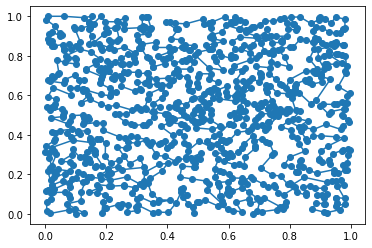

Route: [  0 337  74 251 931 813 648 951 904 446 639 343  80 842 763 129 716  20
 334 718 299 768 889 925 294 554 383 161 134 818 388 533 377  18 883 824
 534 128 429 419 423 152 236 262 692 328 773 297 673 938 593 940 273 289
 584 896  43 861 355 657 636 167 156 398 941 399 104 263  47 148 871 650
 266 992 287 382 452 426 858 145 449 870 628 214 686 142 550 354 141 961
 372 536 740 102 245 912 644 789 638 866 512 608 829 658  64  28 592 515
  44 477 428 320 797  62  26 549 832 164  96 528 542 833 126 947 597 335
 901 225 176  86 574 633 363 814 465  12 708   3 386 757 384 621 913 123
 994 565 616 491 620 642  82 705 891 455 473 863 765  87 788 982 296 662
 744 303  14 880 470 738 576 546 247 486  76 726 548 958 357 403 843 792
 277 530 453 712 158 953 389 406 338 207 422 394 971 222 601  51 954 764
 975 996 420 687 786 781 849 371 724 312 493 271 558 462 737 555 288 697
 151 794 802 942 480 655 291 367 111 707 859 762  36 284   8 269 191 575
 374 162 326 517 352 572 780 489 798 281 166

In [53]:
import matplotlib.pyplot as plt

new_cities_order = np.concatenate((np.array([cities[route[i]] for i in range(len(route))]),np.array([cities[0]])))
plt.scatter(cities[:,0],cities[:,1])
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()

print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,cities)))